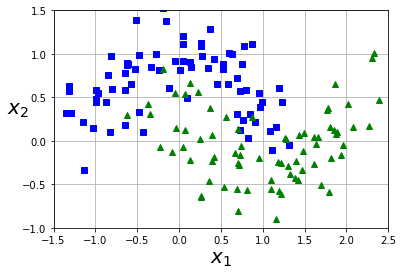

In [7]:
import numpy as np
from sklearn import datasets
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.svm import LinearSVC
from sklearn.datasets import make_moons
import matplotlib
import matplotlib.pyplot as plt
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PolynomialFeatures

#150 points under a high noise scenario with separation
X, y = make_moons(n_samples=150, noise=0.25, random_state=42)


def plot_dataset(X, y, axes):
    plt.plot(X[:, 0][y==0], X[:, 1][y==0], "bs")
    plt.plot(X[:, 0][y==1], X[:, 1][y==1], "g^")
    plt.axis(axes)
    plt.grid(True, which='both')
    plt.xlabel(r"$x_1$", fontsize=20)
    plt.ylabel(r"$x_2$", fontsize=20, rotation=0)

plot_dataset(X, y, [-1.5, 2.5, -1, 1.5])
plt.show()

In [16]:
from sklearn.model_selection import train_test_split
x_train,x_test, y_train, y_test=train_test_split(X,y,test_size=0.3)

In [38]:
from sklearn.svm import SVC

poly_kernel_svm_clf = Pipeline([
        ("scaler", StandardScaler()),
        ("svm_clf", SVC(kernel="poly", degree=3, coef0=1, C=1))
    ])


poly_kernel_svm_clf.fit(X, y)

Pipeline(steps=[('scaler', StandardScaler()),
                ('svm_clf', SVC(C=1, coef0=1, kernel='poly'))])

In [10]:
def plot_predictions(clf, axes):
    x0s = np.linspace(axes[0], axes[1], 100)
    x1s = np.linspace(axes[2], axes[3], 100)
    x0, x1 = np.meshgrid(x0s, x1s)
    X = np.c_[x0.ravel(), x1.ravel()]
    y_pred = clf.predict(X).reshape(x0.shape)
    y_decision = clf.decision_function(X).reshape(x0.shape)
    plt.contourf(x0, x1, y_pred, cmap=plt.cm.brg, alpha=0.2)
    plt.contourf(x0, x1, y_decision, cmap=plt.cm.brg, alpha=0.1)

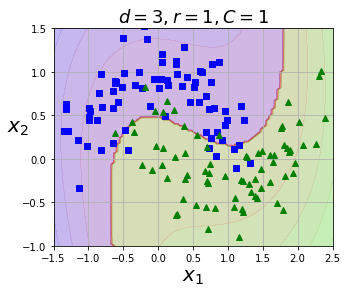

In [40]:
plt.figure(figsize=(11, 4))

plt.subplot(121)
plot_predictions(poly_kernel_svm_clf, [-1.5, 2.5, -1, 1.5])
plot_dataset(X, y, [-1.5, 2.5, -1, 1.5])
plt.title(r"$d=3, r=1, C=1$", fontsize=18)
plt.show()

### building with high c value

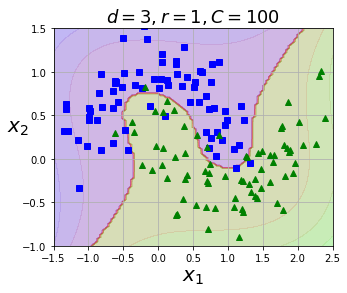

In [37]:
poly_kernel_svm_clf2 = Pipeline([
        ("scaler", StandardScaler()),
        ("svm_clf", SVC(kernel="poly", degree=3, coef0=1, C=100))
    ])


poly_kernel_svm_clf2.fit(X, y)


plt.figure(figsize=(11, 4))

plt.subplot(121)
plot_predictions(poly_kernel_svm_clf2, [-1.5, 2.5, -1, 1.5])
plot_dataset(X, y, [-1.5, 2.5, -1, 1.5])
plt.title(r"$d=3, r=1, C=100$", fontsize=18)
plt.show()

In [ ]:
# When c is lower then it tries to overfit the data because there's too much regularization.

In [41]:
y_test_kernel_pred1 = poly_kernel_svm_clf.predict(x_test)

from sklearn.metrics import confusion_matrix
print(confusion_matrix(y_test, y_test_kernel_pred1))

from sklearn.metrics import accuracy_score
print("\nAccuracy score: ", accuracy_score(y_test, y_test_kernel_pred1))

[[21  2]
 [ 4 18]]

Accuracy score:  0.8666666666666667


In [36]:
y_test_kernel_pred2 = poly_kernel_svm_clf2.predict(x_test)

print(confusion_matrix(y_test, y_test_kernel_pred2))

print("\nAccuracy score: ", accuracy_score(y_test, y_test_kernel_pred2))

[[23  0]
 [ 3 19]]

Accuracy score:  0.9333333333333333


In [ ]:
# the  c is higher this model performs well.  As with the high C value the data will be overfit